# Apprentissage supervisé - Classification

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

## 1 Préparation des données

#### 1.1 Téléchargement de données

In [2]:
mnist = fetch_openml("mnist_784", version=1)
print(mnist.data.shape)

(70000, 784)


In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

1.2 Information sur les données

#### 1.2.1 Le retour de la fonction "fetch_openml" est un dictionnaire (mnist). Affichez ces clés.


In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#### 1.2.2 En utilisant les clés du dictionnaire "mnist", affichez :
• La taille des données (le nombre des features et la taille de chaque feature). Par convention,les données sont à stocker dans une variable "X".
• La taille des labels=classes (le nombre des labels). Par convention, les classes sont souvent à stocker dans une variable "y"
Les différentes classes de la base de données
• Une description détaillée de la base de données.

In [5]:
#Classes = Target et Data = Features

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

il y a 70 000 images comportant chacune 784 valeurs

 "data" : contient les images sous forme de tableaux de 28 x 28 = 784 couleurs de pixel en niveau de gris, c'est-à-dire que la couleur de chaque pixel est représentée par un nombre entre 0 et 16 qui représente si celle-ci est proche du noir ou pas (0 = blanc, 16 = noir). 

 "target": qui contient les annotations (de 1 à 9) correspondant à la valeur "lue" du chiffre.

In [9]:
#Affichage des classes (Target=Label)
set(y)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [10]:
# Une description détaillée de la base de données
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

#### 1.2.3 Affichez l’image de la première instance de la base de données

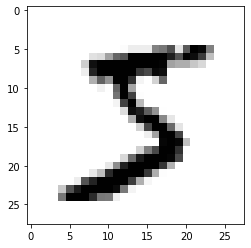

In [11]:
some_digit = X[0]
some_digit_image = some_digit.reshape (28 , 28)
plt.imshow(some_digit_image, cmap='binary')

In [12]:
y[0]

'5'

#### 1.2.4. Affichez le type des labels

In [13]:
type(y[0])

str

#### 1.2.5 Casting sur les labels pour les transformerà des entiers

In [14]:
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

### 1.3 Répartition des données

Nous sélectionnons 60000 exemples pour l’apprentissage et 10000 pour le test (la base MNIST est organisée de cette manière).
Pour les tests à venir, il est important de garantir que les exemples sont aléatoirement répartis
dans la base d’apprentissage afin que tout tirage d’un sous-ensemble comporte à peu près la
même proportion de chaque chiffre.

In [15]:
X_test,X_train = X[60000:],X[:60000]
y_test,y_train = y[60000:],y[:60000]

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## 2. Apprentissage d’un classifieur binaire

### 2.1 Apprentissage des données

In [16]:
y_train_5 = ( y_train == 5)
y_test_5 = ( y_test == 5)

In [17]:
print(y_train_5)
print(y_test_5)

[ True False False ...  True False False]
[False False False ... False  True False]


In [18]:
model = SGDClassifier()

In [19]:
model.fit(X_train, y_train_5)

SGDClassifier()

In [20]:
print(X_train.shape)
print(y_train_5.shape)

(60000, 784)
(60000,)


In [21]:
y_pred = model.predict(X_train[[0]])
y_pred

array([False])

### 2.1.2 utilisation du classifieur Stochastic Gradient Descent (SGD) pour la prédiction du chiffre 5

In [22]:
model.score(X_train, y_train)

0.09878333333333333

### 2.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

### 2.2.1 Taux de classification

In [23]:
scores = cross_val_score(model, X_train, y_train_5, scoring="accuracy", cv=3)
scores

array([0.96375, 0.96105, 0.9687 ])

In [24]:
scores.mean()

0.9645

In [25]:
class Never5Classifier(BaseEstimator):
    def fit(self,X, y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)
    
object_no_5 = Never5Classifier()
object_no_5.fit(X_train, y_train_5)

In [26]:
scores = cross_val_score(object_no_5, X_train, y_train_5, scoring="accuracy", cv=3)

In [27]:
scores.mean()

0.90965

In [28]:
y_train_pred = cross_val_predict(model, X_train, y_train_5, cv=3)

### 2.2.2 Matrice de confusion

In [29]:
confusion_matrix(y_train_5, y_train_pred)

array([[53453,  1126],
       [ 1240,  4181]], dtype=int64)

### 2.2.3 Précision et rappel

#### La précision, le rappel et le score F1 du modèle d’apprentissage

In [30]:
precision_score(y_train_5 , y_train_pred)

0.7878273977765216

In [31]:
recall_score(y_train_5, y_train_pred)

0.7712599151448072

In [32]:
f1_score(y_train_5, y_train_pred)

0.779455630126771

#### Scores des différentes instances de la base d’apprentissage

In [33]:
y_scores = cross_val_predict(model, X_train, y_train_5, method = 'decision_function', cv=3)
y_scores

array([  1785.07810528, -13927.10409493, -22666.83667146, ...,
        10630.75358201,  -7784.94685594, -16824.42581731])

## 3.Calcule des précisions et des rappels de chaque instance

In [34]:
#Avec ces scores, utilisez la precision_recall_curve() 
#fonction pour calculer la précision et le rappel pour tous les seuils possibles
precision_recall_curve(y_train_5, y_scores)

(array([0.09043591, 0.09042074, 0.09042225, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-86687.55432288, -86573.10340941, -86275.27397902, ...,
         34359.88658138,  36555.73276681,  43289.54936636]))

## 4.Tracé de la courbe des précisions/rappels

In [35]:
precision, recall, threshold = precision_recall_curve(y_train_5,y_scores)

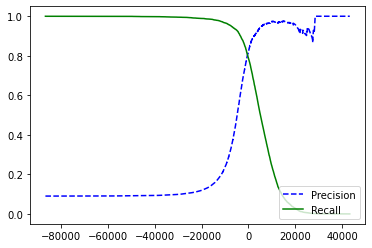

In [36]:
def plot_precision_recall_vs_threshold (precision, recall, threshold):

    plt.plot(threshold, precision[:-1], "b--", label="Precision")
    plt.plot(threshold, recall[:-1], "g-", label="Recall")   

plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.legend(loc="lower right")
plt.show()

### 2.2.4 Courbe ROC

#### 2.2.4.1 Calculez le taux de faux positifs (tfp), le taux de vrais positifs (tvp)

La fonction roc_curve() attend des étiquettes et des scores, mais au lieu de scores, vous pouvez lui donner des probabilités de classe. Utilisons la probabilité de la classe positive comme score.
sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

In [37]:
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [38]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99895564, 0.99895564,
       1.        ])

In [39]:
tpr

array([0.00000000e+00, 1.84467810e-04, 2.02914591e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

#### 2.2.4.2 Tracé la courbe des ROC

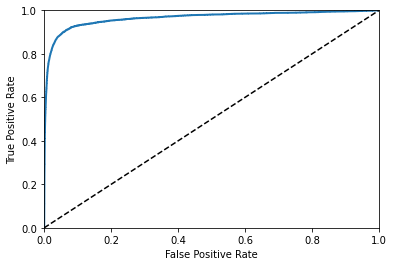

In [40]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

#### 2.2.4.3 Calcule de l’AUC (Area Under the Curve) du modèle d’apprentissage

In [41]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9646399924232295


In [42]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9646399924232295

## 3.1 Apprentissage des données - Multiclass Classification

#### 3.1.1 l’apprentissage du modèleà partir de toutes les classes de la BD

In [43]:
model2 = SGDClassifier()

#### 3.1.2 Prédiction de la classe de la première instance de la BD

In [44]:
model2.fit(X_train, y_train)
print(model2.predict([some_digit]))

[5]


#### Les 10 scores de décision utilisés par la méthode SGD pour classifier la première instance de la BD

In [45]:
some_digit_scores = model2.decision_function([some_digit])
print(some_digit_scores)

[[-13762.12685897 -20452.35085357  -8726.14289523  -1033.04468467
  -28356.01504776   1434.22375226 -27799.21875129 -14930.68570986
  -12002.43720427 -12466.35953188]]


#### Les différentes classes utilisées par le classifieur

In [46]:
print(model2.classes_)

[0 1 2 3 4 5 6 7 8 9]


### 3.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 3.2.1 Taux de classificationv:  vérifions ces classificateurs via CV

##### Base d’apprentissage en base d’apprentissage et en base de validation

In [47]:
print("CV score:\n",cross_val_score(model2, X_train, y_train, cv=3, scoring="accuracy"))

CV score:
 [0.8763 0.8826 0.8772]


#### Amélioration des taux de classification

La mise à l'échelle (Scaling) des entrées devrait aider à améliorer les scores.

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(model2, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\Sialorama\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9001 , 0.89955, 0.90435])

### 3.2.2 Matrice de Confusion

In [ ]:
y_train_pred = cross_val_predict(model2, X_train_scaled, y_train, cv=3)

#### Affichez la matrice de confusion du modèle d’apprentissage.

In [51]:
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(model2, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

KeyboardInterrupt: 

#### Représentation graphique

In [52]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

NameError: name 'conf_mx' is not defined